# Malicious URL detection using ML and DL 
## Data Collection & Feature Extraction <br>


In [81]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# import os
# print(os.listdir("../input"))


In [82]:
urldata = pd.read_csv("/kaggle/input/newdataset/newdataset.csv")

In [83]:
urldata.head()

,url,label,result
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0


In [84]:
# #Removing the unnamed columns as it is not necesary.
# urldata = urldata.drop('Unnamed: 3',axis=1)

In [85]:
urldata.shape

(59999, 3)

In [86]:
urldata.head()

,url,label,result
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0


In [87]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     59999 non-null  object
 1   label   59999 non-null  object
 2   result  59999 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Checking Missing Values

In [88]:
urldata.isnull().sum()

url       0
label     0
result    0
dtype: int64

# 1. DATA PREPROCESSING

The following features will be extracted from the URL for classification. <br>
<ol>
    <li>Length Features
    <ul>
        <li>Length Of Url</li>
        <li>Length of Hostname</li>
        <li>Length Of Path</li>
        <li>Length Of First Directory</li>
        <li>Length Of Top Level Domain</li>
    </ul>
    </li>
    <br>
   <li>Count Features
    <ul>
    <li>Count Of  '-'</li>
    <li>Count Of '@'</li>
    <li>Count Of '?'</li>
    <li>Count Of '%'</li>
    <li>Count Of '.'</li>
    <li>Count Of '='</li>
    <li>Count Of 'http'</li>
    <li>Count Of 'www'</li>
    <li>Count Of Digits</li>
    <li>Count Of Letters</li>
    <li>Count Of Number Of Directories</li>
    </ul>
    </li>
    <br>
    <li>Binary Features
    <ul>
        <li>Use of IP or not</li>
        <li>Use of Shortening URL or not</li>
    </ul>
    </li>
    
</ol>



### 1.1 Length Features

In [89]:
#Importing dependencies
from urllib.parse import urlparse
import os.path

In [90]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [91]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [92]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [93]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [94]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length
0,br-icloud.com.br,phishing,1,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,11,100,1
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,45,3


Dataset after extracting length features

### 1.2 Count Features

In [95]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [96]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [97]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [98]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [99]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [100]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [101]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [102]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [103]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [104]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [105]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [106]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [107]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,br-icloud.com.br,phishing,1,16,0,16,0,1,0,0,0,2,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,0,0,0,0,2,0,0,0,0,1,29,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,0,0,0,0,2,0,0,0,0,1,25,3
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,11,100,1,16,0,0,0,2,0,1,0,0,1,93,3
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,45,3,1,0,0,0,2,0,0,0,0,4,31,6


## 1.3 Binary Features

The following features will be extracted from the URL for classification.
- Use of IP or not
- Use of Shortening URL or not

#### IP Address in the URL

Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

In [108]:
import re

In [109]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

####  Using URL Shortening Services “TinyURL”

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.

In [110]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features

In [111]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,br-icloud.com.br,phishing,1,16,0,16,0,1,0,0,...,2,0,0,0,0,0,13,0,1,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,35,5,0,0,0,...,2,0,0,0,0,1,29,2,1,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,31,7,0,0,0,...,2,0,0,0,0,1,25,3,1,1
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,11,100,1,16,0,0,...,2,0,1,0,0,1,93,3,1,1
4,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,0,45,3,1,0,0,...,2,0,0,0,0,4,31,6,1,1


# 2. Data Visualization

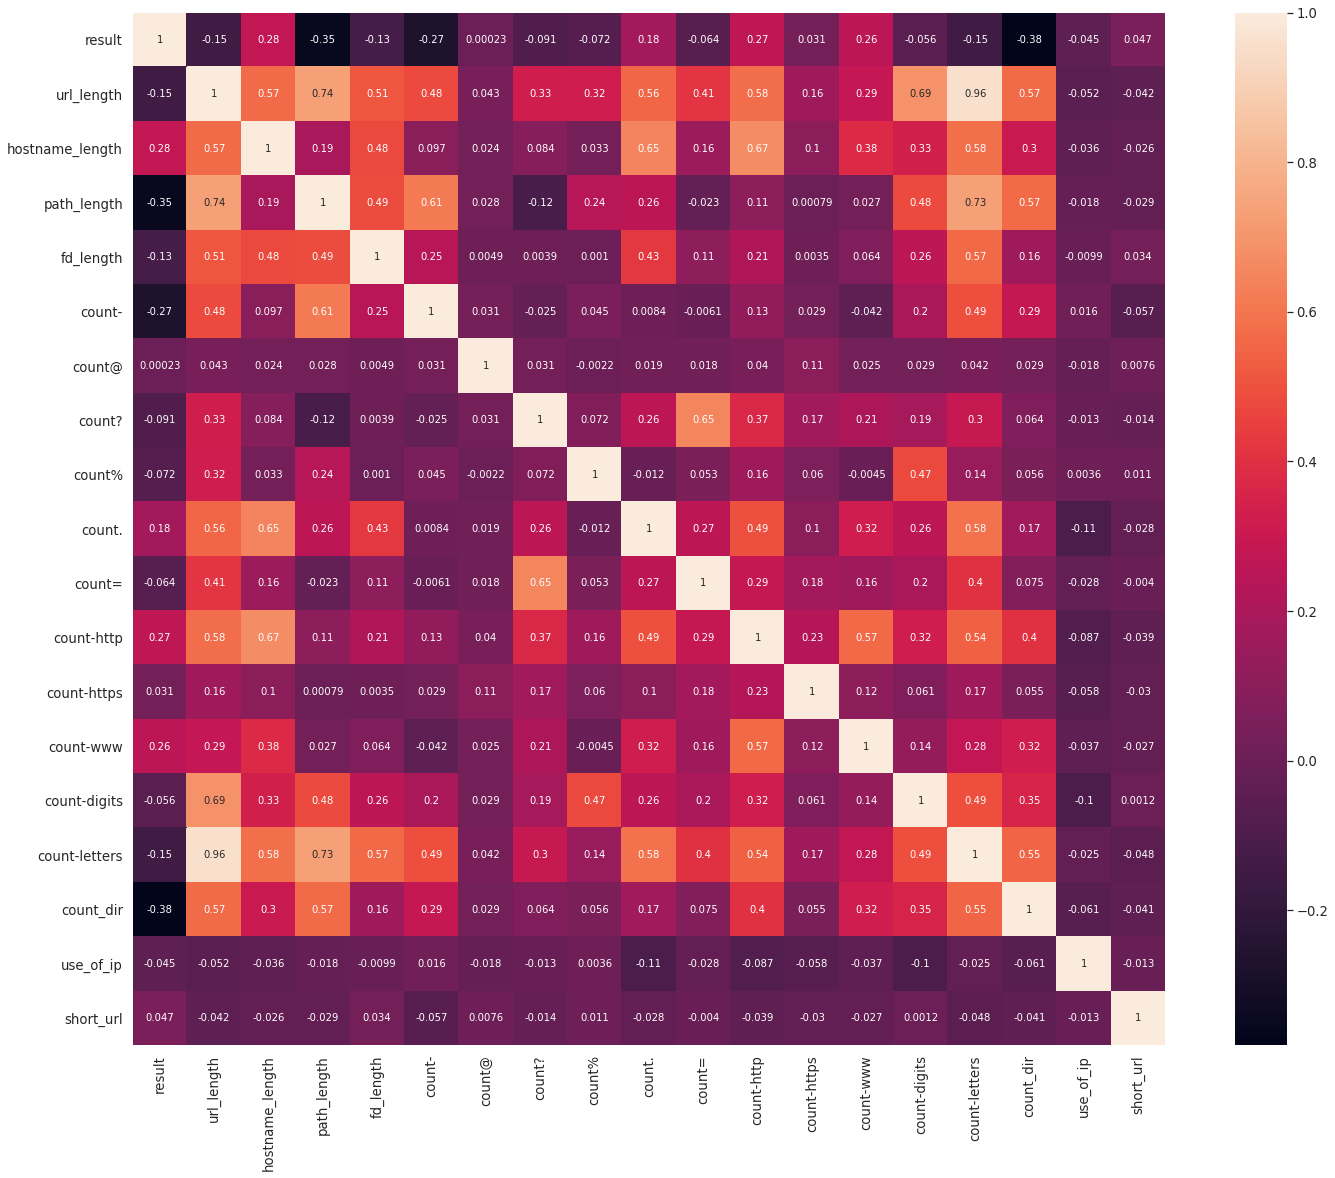

In [112]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

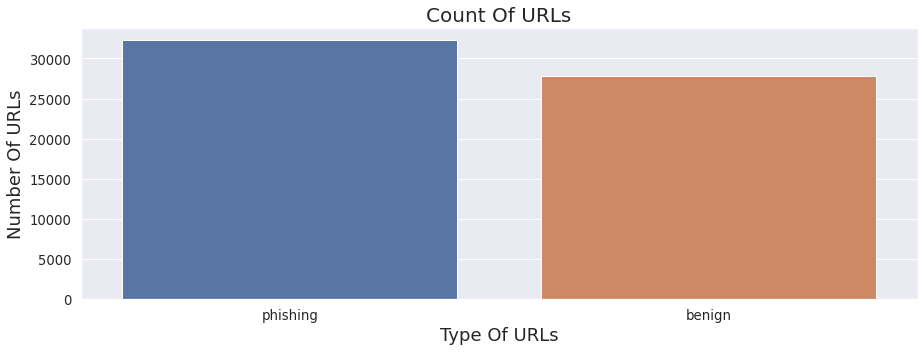

In [113]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [114]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='phishing'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:53.72 %
Percent Of Benign URLs:46.28 %


The data shows a class imbalance to some extent.

(0.0, 1000.0)

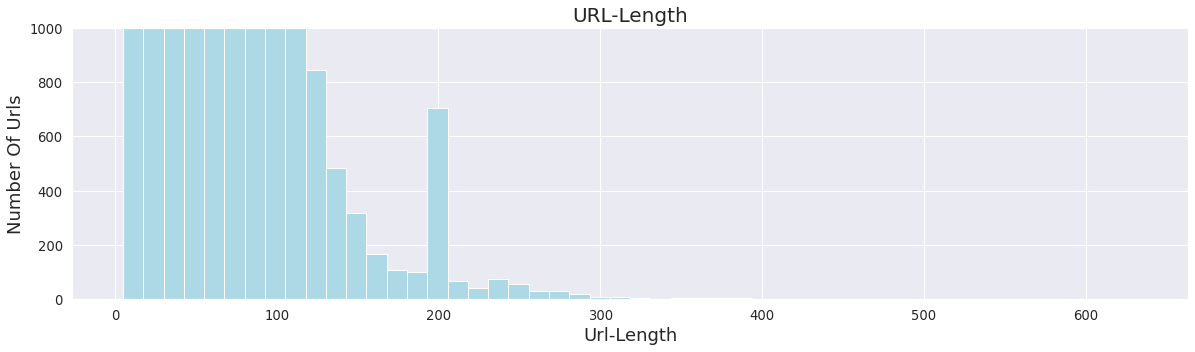

In [115]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

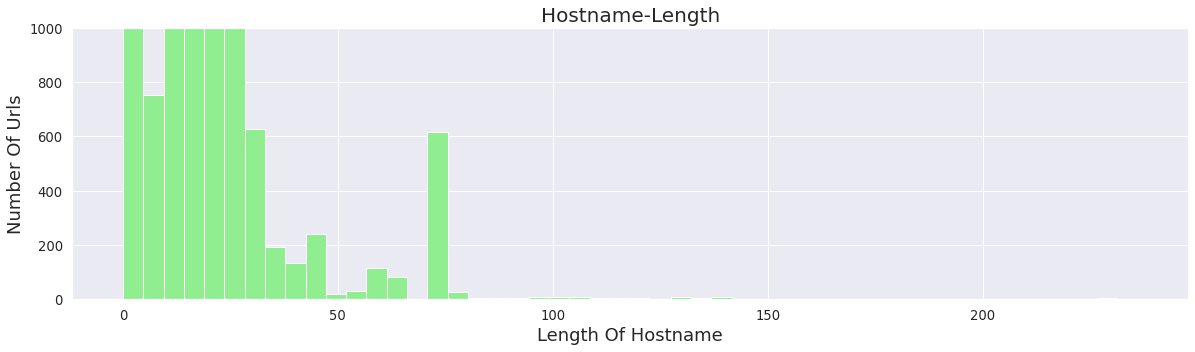

In [116]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

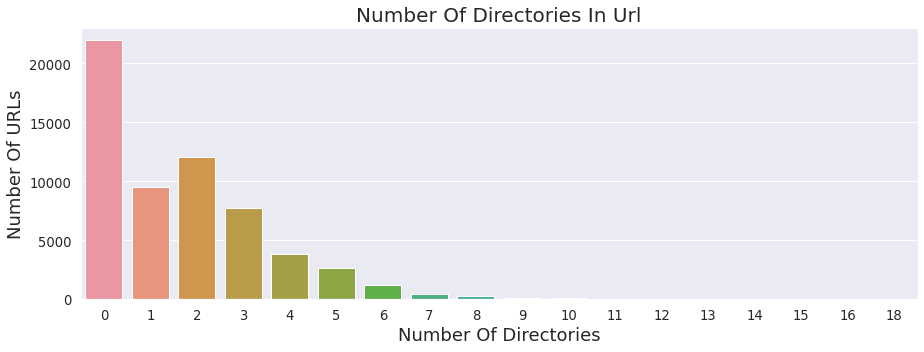

In [117]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

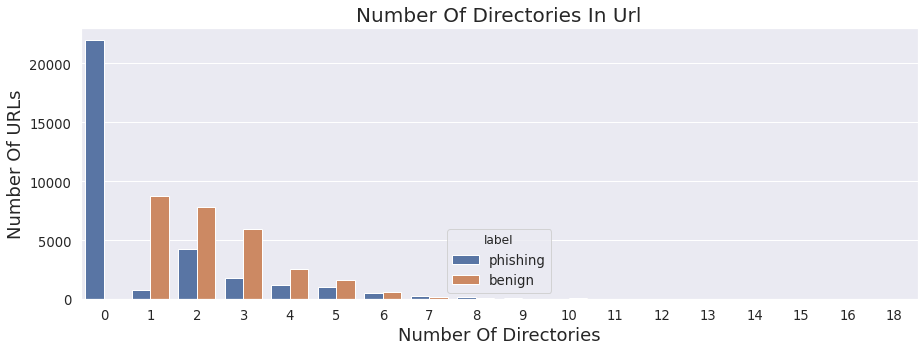

In [118]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

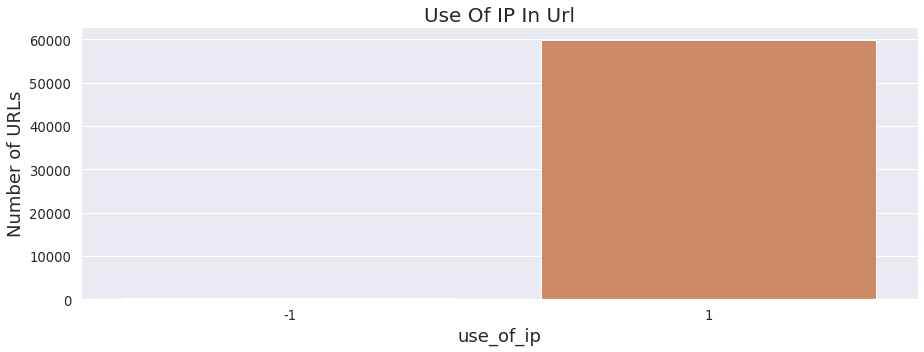

In [119]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

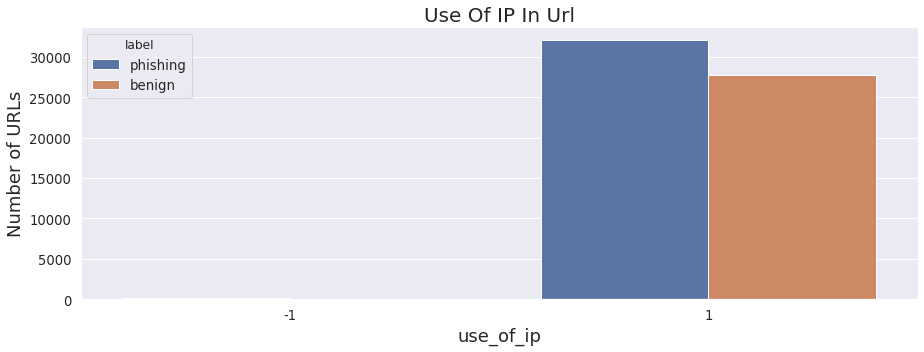

In [120]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

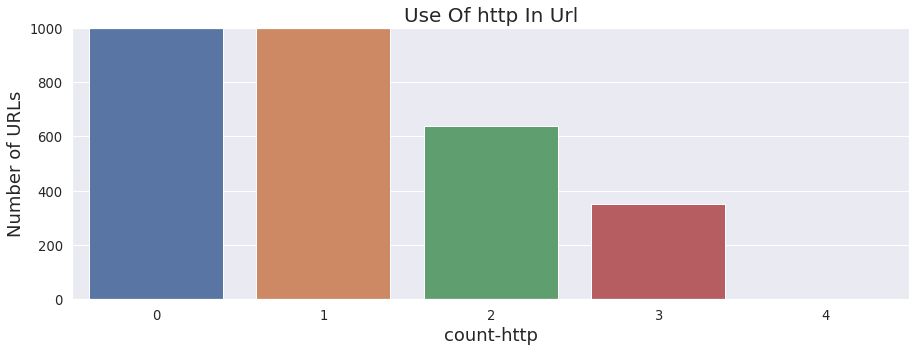

In [121]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

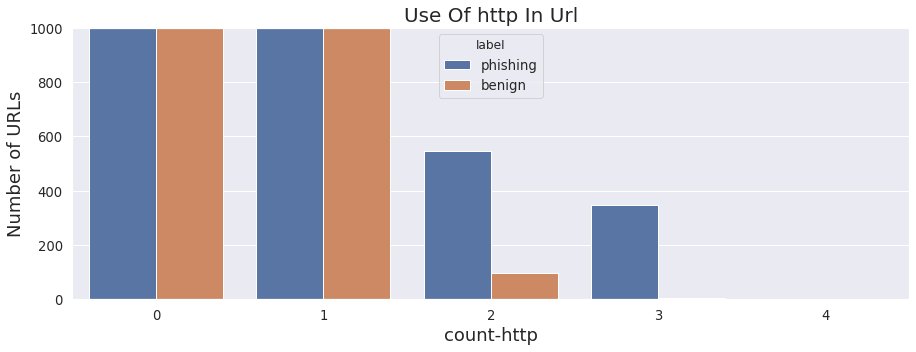

In [122]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

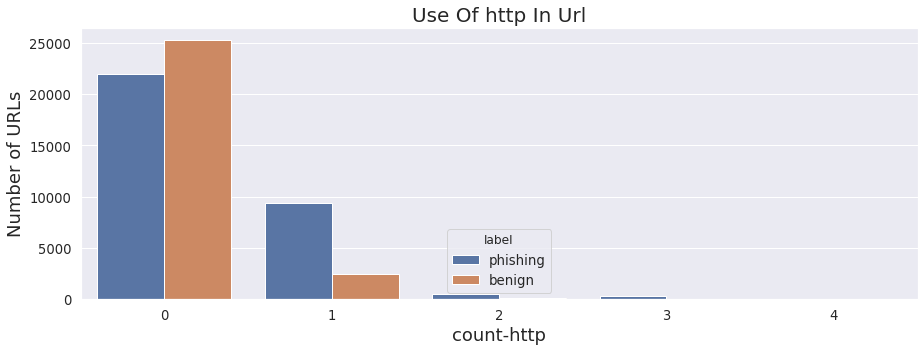

In [123]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

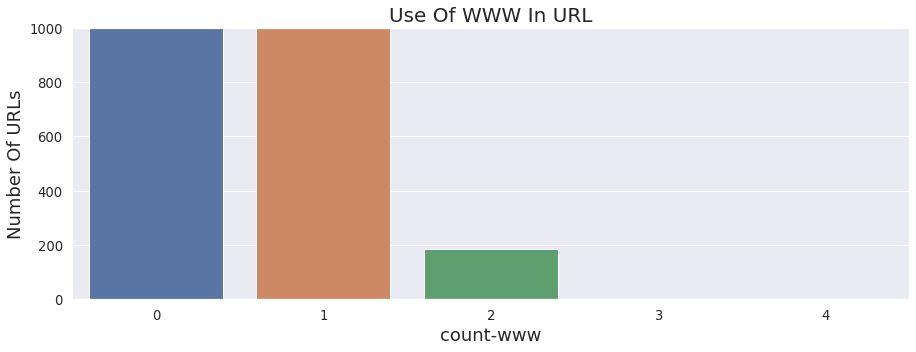

In [124]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

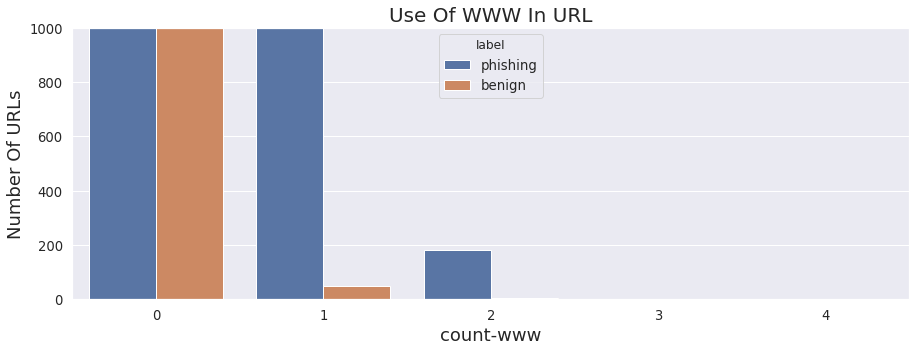

In [125]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

# **Model Training**
## OBJECTIVE : Training classification model to find the model which would optimally classify legitimate and malicious domains. <br>

Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :
- Decision Tree
- Random Forest
- Multilayer Perceptron (deep learning)

In [126]:
#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = urldata['result']

## 3.1 Train test split

## Oversampling Imbalanced Dataset

During EDA we found that our dataset is Imbalanced,so we'll now use SMOTE method to oversample the dataset.

In [127]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd

# Fit and transform your data
x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

# Convert the oversampled arrays back to dataframes if needed
x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# Checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)


Size of x-sample : (64464, 16)
Size of y-sample : (64464, 1)


### **Data Splitting**

We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [128]:
#Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (51571, 16)
Shape of x_valid:  (12893, 16)
Shape of y_train:  (51571, 1)
Shape of y_valid:  (12893, 1)


## **1] Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [130]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc_dt = accuracy_score(y_train,y_pred_train)
test_acc_dt = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc_dt,3))
print("Accuracy on Testing dataset : ",round(test_acc_dt,3))


Accuracy on Training dataset :  0.995
Accuracy on Testing dataset :  0.992


              precision    recall  f1-score   support

  legitimate       0.99      0.99      0.99      6430
   malicious       0.99      0.99      0.99      6463

    accuracy                           0.99     12893
   macro avg       0.99      0.99      0.99     12893
weighted avg       0.99      0.99      0.99     12893



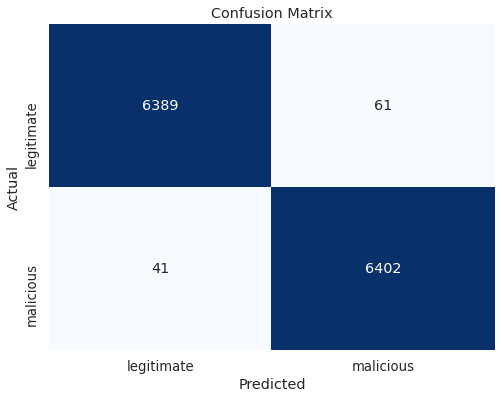

In [131]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["legitimate", "malicious"],
            yticklabels=["legitimate", "malicious"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

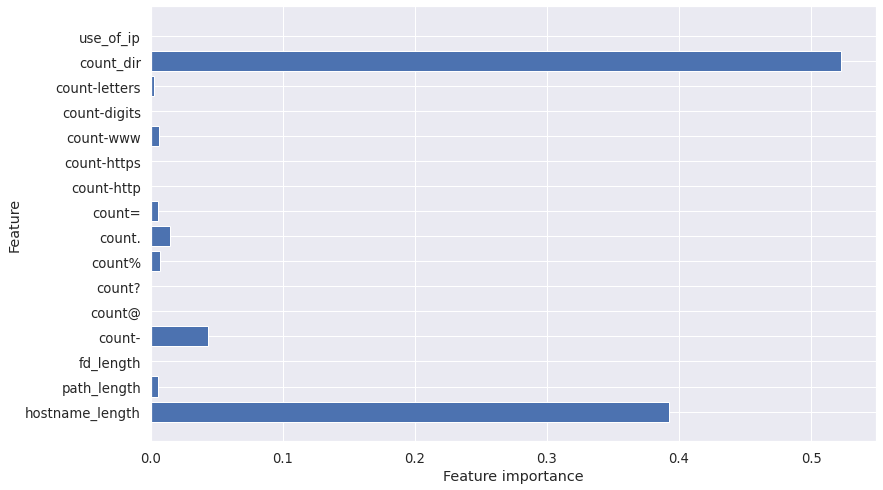

In [132]:

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **2] Random Forest**
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [133]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [134]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc_rf = accuracy_score(y_train,y_pred_train)
test_acc_rf = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc_rf,3))
print("Accuracy on Testing dataset : ",round(test_acc_rf,3))

Accuracy on Training dataset :  0.997
Accuracy on Testing dataset :  0.996


              precision    recall  f1-score   support

  legitimate       0.99      1.00      1.00      6435
   malicious       1.00      0.99      1.00      6458

    accuracy                           1.00     12893
   macro avg       1.00      1.00      1.00     12893
weighted avg       1.00      1.00      1.00     12893



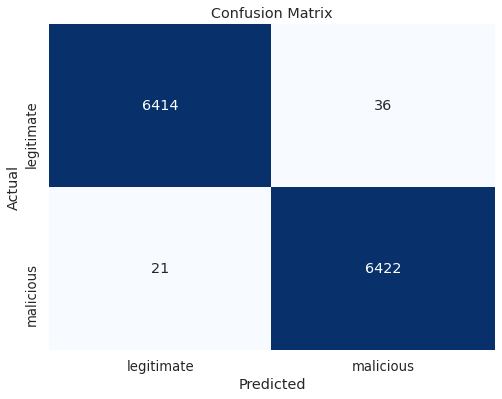

In [135]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["legitimate", "malicious"],
            yticklabels=["legitimate", "malicious"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

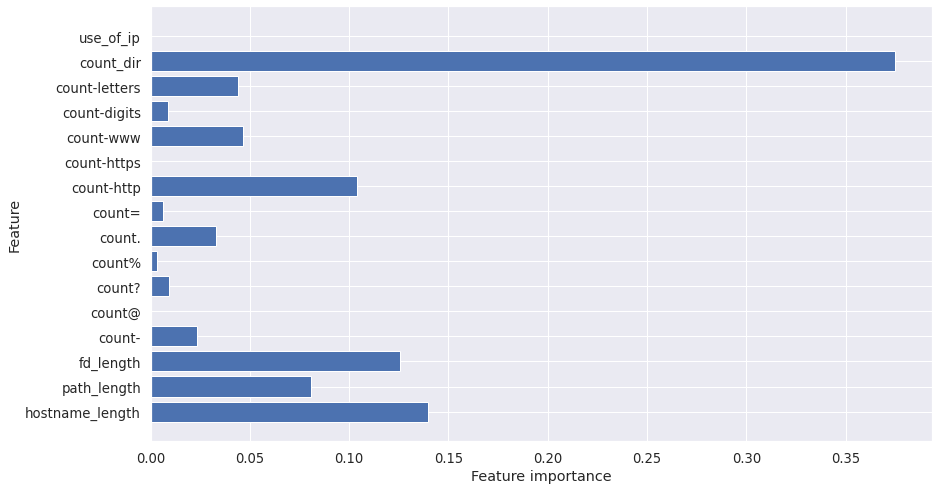

In [136]:

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **3] Multilayer Perceptron (Deep Learning)**
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [138]:
# print input shape
x_train.shape

(51571, 16)

In [139]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [140]:
# compiling model
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [141]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [142]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
202/202 [==============================] - 0s 2ms/step - loss: 0.8467 - acc: 0.4719 - val_loss: 0.6717 - val_acc: 0.5335
Epoch 2/10
202/202 [==============================] - 0s 2ms/step - loss: 0.5768 - acc: 0.6024 - val_loss: 0.4790 - val_acc: 0.6252
Epoch 3/10
202/202 [==============================] - 0s 2ms/step - loss: 0.4298 - acc: 0.7207 - val_loss: 0.3979 - val_acc: 0.8768
Epoch 4/10
202/202 [==============================] - 0s 2ms/step - loss: 0.3758 - acc: 0.9086 - val_loss: 0.3599 - val_acc: 0.9178
Epoch 5/10
202/202 [==============================] - 0s 2ms/step - loss: 0.3475 - acc: 0.9414 - val_loss: 0.3376 - val_acc: 0.9500
Epoch 6/10
202/202 [==============================] - 0s 2ms/step - loss: 0.3286 - acc: 0.9612 - val_loss: 0.3216 - val_acc: 0.9687
Epoch 7/10
202/202 [==============================] - 0s 2ms/step - loss: 0.3152 - acc: 0.9714 - val_loss: 0.3100 - val_acc: 0.9781
Epoch 8/10
202/202 [==============================] - 0s 2ms/step - loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


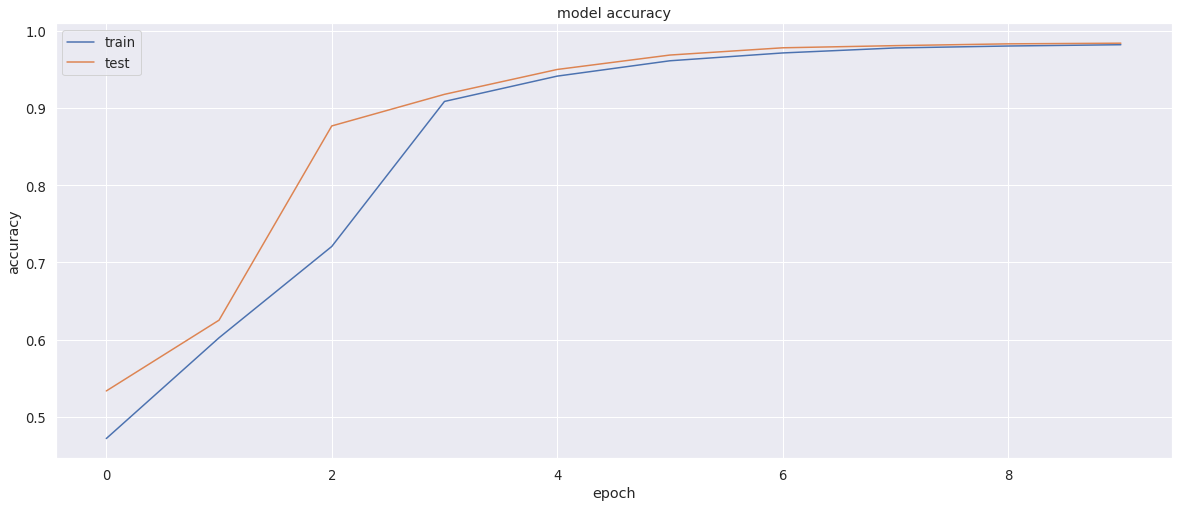

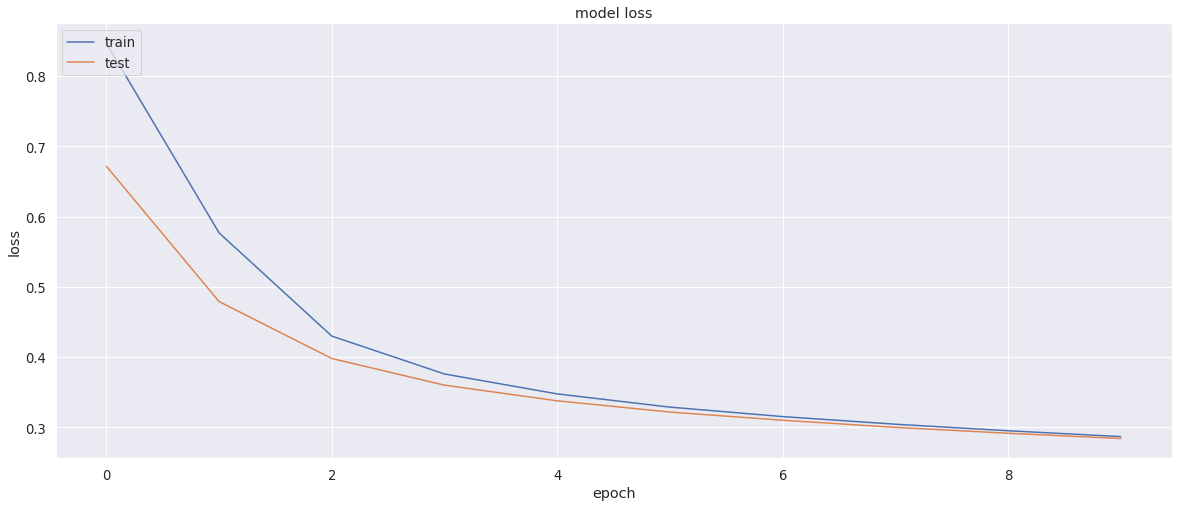

In [143]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [144]:

# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

403/403 [==============================] - 0s 746us/step - loss: 0.2839 - acc: 0.9840
Test loss: 0.2839292883872986
Test Accuracy: 0.984022319316864


              precision    recall  f1-score   support

  legitimate       0.99      0.98      0.98      6450
   malicious       0.98      0.99      0.98      6443

    accuracy                           0.98     12893
   macro avg       0.98      0.98      0.98     12893
weighted avg       0.98      0.98      0.98     12893



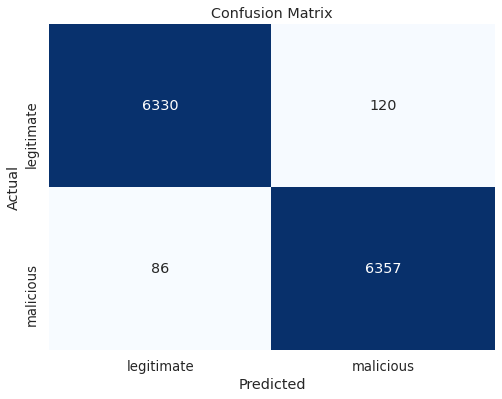

In [145]:
# Get predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary values (0 or 1)

# Generate and print the classification report
print(classification_report(y_test, y_pred, target_names=["legitimate", "malicious"]))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["legitimate", "malicious"],
            yticklabels=["legitimate", "malicious"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [146]:
# Calculate accuracies for each model
accuracy_dt = test_acc_dt
accuracy_rf = test_acc_rf
accuracy_mlp = acc  

# Create a DataFrame to compare accuracies
data = {'Method': ['Decision Tree', 'Random Forest', 'Multilayer Perceptron'],
        'Accuracy': [accuracy_dt, accuracy_rf, accuracy_mlp]}

accuracy_df = pd.DataFrame(data)

print(accuracy_df)

# Find the maximum accuracy and the corresponding method
max_accuracy_row = accuracy_df[accuracy_df['Accuracy'] == accuracy_df['Accuracy'].max()]

# Reset the index of max_accuracy_row
max_accuracy_row.reset_index(drop=True, inplace=True)

# Display the maximum accuracy and the corresponding method
print("\nMaximum Accuracy:")
print(max_accuracy_row)



                  Method  Accuracy
0          Decision Tree  0.992089
1          Random Forest  0.995579
2  Multilayer Perceptron  0.984022

Maximum Accuracy:
          Method  Accuracy
0  Random Forest  0.995579


Performing 5-fold cross-validation for Decision Tree...


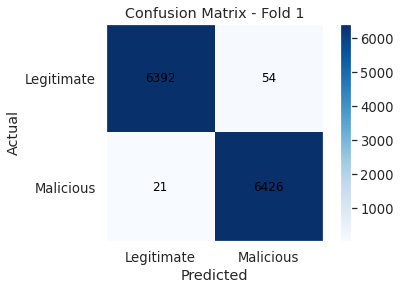

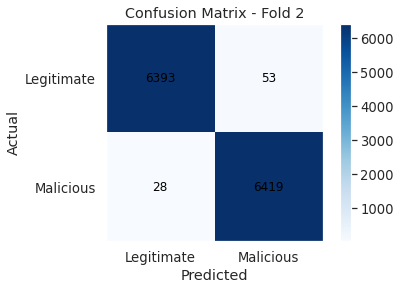

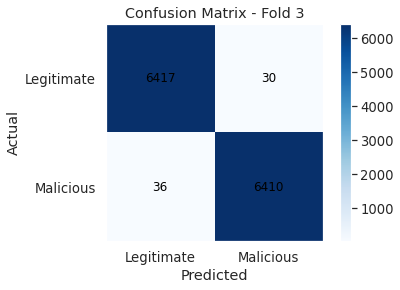

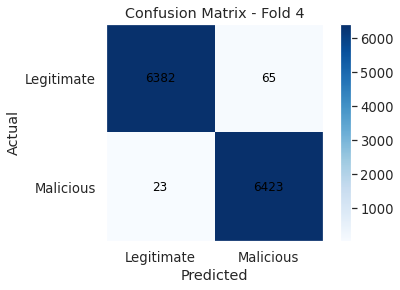

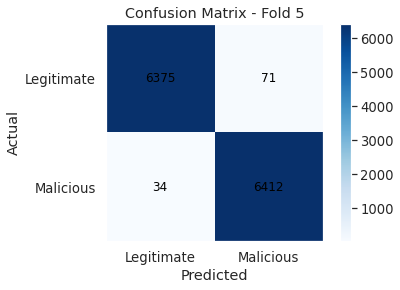

Cross-validation Scores for Each Fold:
Fold 1: 0.9942
Fold 2: 0.9937
Fold 3: 0.9949
Fold 4: 0.9932
Fold 5: 0.9919
Mean Accuracy across 5 Folds: 0.9936


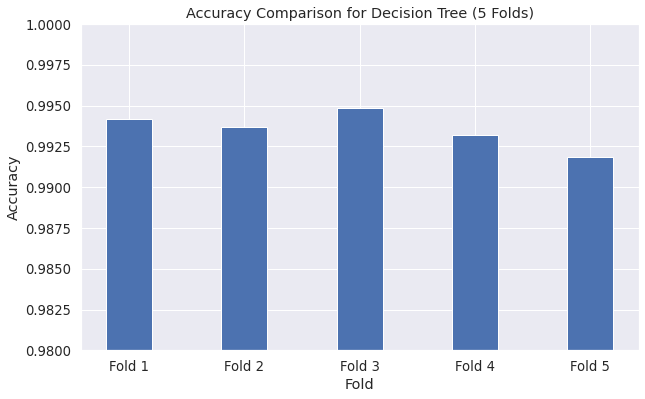

In [147]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=7)

fold_accuracies = []
confusion_matrices = []

# Labels for the classes
class_labels = ["Legitimate", "Malicious"]

# Perform 5-fold cross-validation for Decision Tree
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Performing 5-fold cross-validation for Decision Tree...")
for fold_idx, (train, test) in enumerate(cv.split(x_sample, y_sample)):
    x_train, x_test = x_sample.iloc[train], x_sample.iloc[test]
    y_train, y_test = y_sample.iloc[train], y_sample.iloc[test]

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    fold_accuracies.append(accuracy)
    confusion_matrices.append(confusion)

    # Display confusion matrix as an image with labels
    plt.figure(figsize=(6, 4))
    plt.imshow(confusion, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Confusion Matrix - Fold {fold_idx + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0, 1], class_labels)
    plt.yticks([0, 1], class_labels)
    
    # Remove grid lines
    plt.grid(False)
    
    # Add text annotations for values in the confusion matrix
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black', fontsize=12)

    plt.show()

# Print cross-validation scores for each fold
print("Cross-validation Scores for Each Fold:")
for fold_idx, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold_idx + 1}: {accuracy:.4f}")

# Calculate and print mean accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across 5 Folds: {mean_accuracy:.4f}")

# Create a bar graph (bargraph) comparing accuracy values for all 5 folds
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 6), fold_accuracies, width=0.4, align='center')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Decision Tree (5 Folds)')
plt.ylim(0.98, 1.0)
plt.xticks(np.arange(1, 6), [f"Fold {i}" for i in range(1, 6)])
plt.grid(True)
plt.show()


Performing 5-fold cross-validation for Random Forest...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


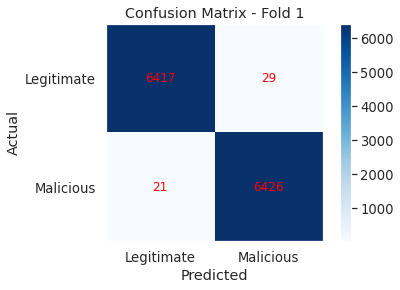

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


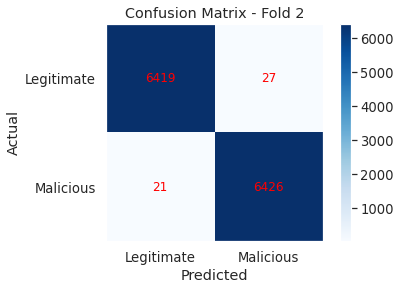

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


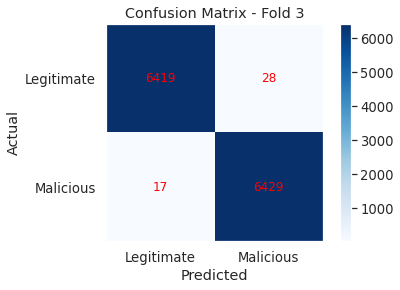

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


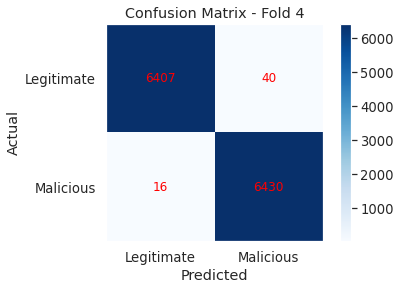

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


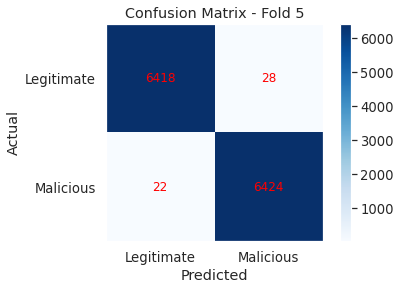

Cross-validation Scores for Each Fold:
Fold 1: 0.9961
Fold 2: 0.9963
Fold 3: 0.9965
Fold 4: 0.9957
Fold 5: 0.9961
Mean Accuracy across 5 Folds: 0.9961


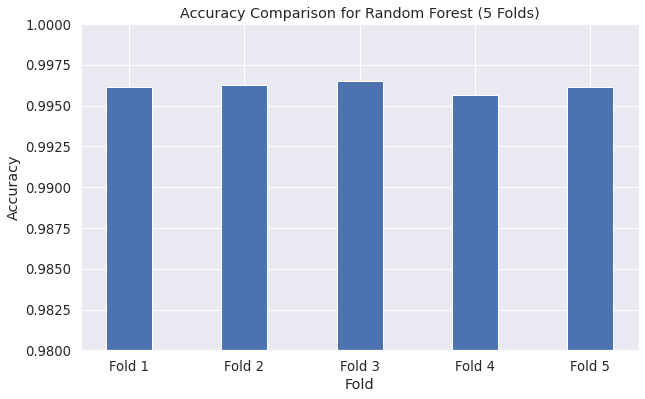

In [148]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the Random Forest classifier
clf = RandomForestClassifier(max_depth=7)

fold_accuracies = []
confusion_matrices = []

# Labels for the classes
class_labels = ["Legitimate", "Malicious"]

# Perform 5-fold cross-validation for Random Forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Performing 5-fold cross-validation for Random Forest...")
for fold_idx, (train, test) in enumerate(cv.split(x_sample, y_sample)):
    x_train, x_test = x_sample.iloc[train], x_sample.iloc[test]
    y_train, y_test = y_sample.iloc[train], y_sample.iloc[test]

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    fold_accuracies.append(accuracy)
    confusion_matrices.append(confusion)

    # Display confusion matrix as an image with labels
    plt.figure(figsize=(6, 4))
    plt.imshow(confusion, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Confusion Matrix - Fold {fold_idx + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0, 1], class_labels)
    plt.yticks([0, 1], class_labels)
    
    # Remove grid lines
    plt.grid(False)

    # Add text annotations for values in the confusion matrix
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='red', fontsize=12)

    plt.show()

# Print cross-validation scores for each fold
print("Cross-validation Scores for Each Fold:")
for fold_idx, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold_idx + 1}: {accuracy:.4f}")

# Calculate and print mean accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across 5 Folds: {mean_accuracy:.4f}")

# Create an accuracy comparison plot for all 5 folds
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 6), fold_accuracies, width=0.4, align='center')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Random Forest (5 Folds)')
plt.ylim(0.98, 1.0)
plt.xticks(np.arange(1, 6), [f"Fold {i}" for i in range(1, 6)])
plt.show()


In [149]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, confusion_matrix
# from sklearn.neural_network import MLPClassifier
# import numpy as np

# # Define the MLP classifier
# clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# fold_accuracies = []
# confusion_matrices = []

# # Labels for the classes
# class_labels = ["Legitimate", "Malicious"]

# # Perform 5-fold cross-validation for MLP
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# print("Performing 5-fold cross-validation for MLP...")
# for fold_idx, (train, test) in enumerate(cv.split(x_sample, y_sample)):
#     x_train, x_test = x_sample.iloc[train], x_sample.iloc[test]
#     y_train, y_test = y_sample.iloc[train], y_sample.iloc[test]

#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     confusion = confusion_matrix(y_test, y_pred)

#     fold_accuracies.append(accuracy)
#     confusion_matrices.append(confusion)

#     # Display confusion matrix as an image with labels
#     plt.figure(figsize=(6, 4))
#     plt.imshow(confusion, cmap='Blues', interpolation='nearest')
#     plt.colorbar()
#     plt.title(f"Confusion Matrix - Fold {fold_idx + 1}")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.xticks([0, 1], class_labels)
#     plt.yticks([0, 1], class_labels)
    
#     # Remove grid lines
#     plt.grid(False)

#     # Add text annotations for values in the confusion matrix
#     for i in range(2):
#         for j in range(2):
#             plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='red', fontsize=12)

#     plt.show()

# # Print cross-validation scores for each fold
# print("Cross-validation Scores for Each Fold:")
# for fold_idx, accuracy in enumerate(fold_accuracies):
#     print(f"Fold {fold_idx + 1}: {accuracy:.4f}")

# # Calculate and print mean accuracy
# mean_accuracy = np.mean(fold_accuracies)
# print(f"Mean Accuracy across 5 Folds: {mean_accuracy:.4f}")

# # Create an accuracy comparison plot for all 5 folds
# plt.figure(figsize=(10, 6))
# plt.bar(np.arange(1, 6), fold_accuracies, width=0.4, align='center')
# plt.xlabel('Fold')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Comparison for MLP (5 Folds)')
# plt.ylim(0.98, 1.0)
# plt.xticks(np.arange(1, 6), [f"Fold {i}" for i in range(1, 6)])
# plt.show()


Performing 5-fold cross-validation for MLP...
Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7884
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1752 - accuracy: 0.9396
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9789
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9876
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.9898
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 10/10
202/202 [==============================] -

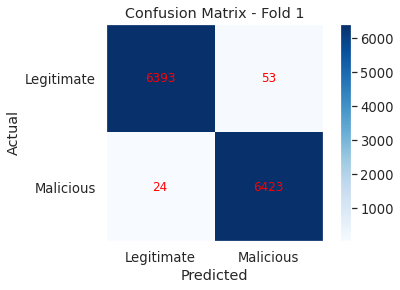

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8041
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1998 - accuracy: 0.9242
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9424
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9812
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9881
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9898
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9905
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9908
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 10/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9921

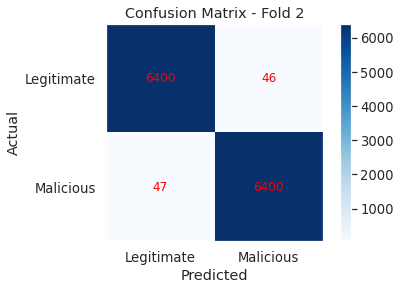

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 0.6504 - accuracy: 0.7741
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9237
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9322
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.9739
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9886
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0452 - accuracy: 0.9907
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9916
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9916
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9932
Epoch 10/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9934

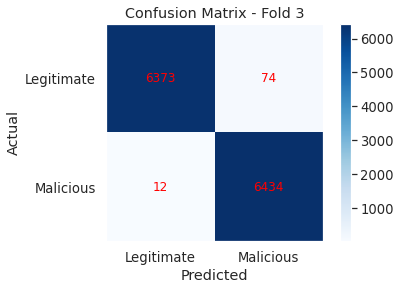

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 0.3091 - accuracy: 0.8744
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9464
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0982 - accuracy: 0.9787
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9866
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9893
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9905
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9914
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9918
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 10/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9932

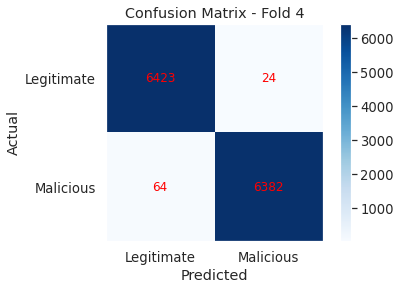

Epoch 1/10
202/202 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9136
Epoch 2/10
202/202 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9697
Epoch 3/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9853
Epoch 4/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9889
Epoch 5/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0367 - accuracy: 0.9902
Epoch 6/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9922
Epoch 7/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 8/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9935
Epoch 9/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/10
202/202 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9940

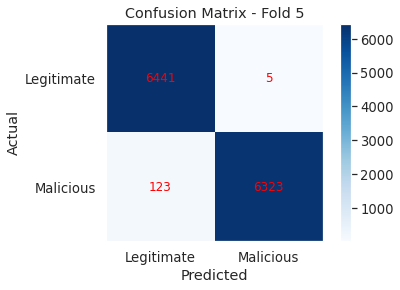

Cross-validation Scores for Each Fold:
Fold 1: 0.9940
Fold 2: 0.9928
Fold 3: 0.9933
Fold 4: 0.9932
Fold 5: 0.9901
Mean Accuracy across 5 Folds: 0.9927


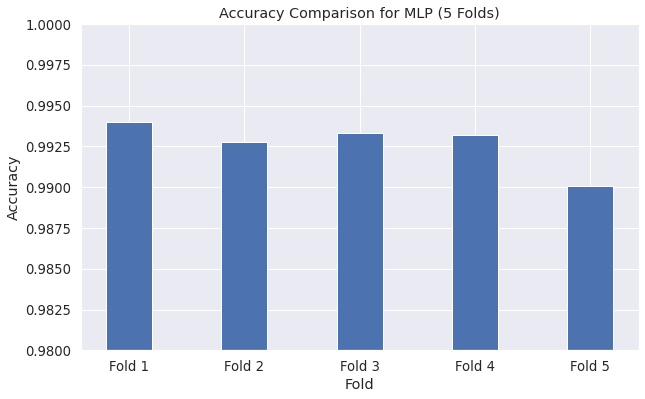

In [150]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Define the MLP classifier function
def create_mlp_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(16,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize lists to store accuracy and confusion matrices for each fold
fold_accuracies = []
confusion_matrices = []

# Labels for the classes
class_labels = ["Legitimate", "Malicious"]

# Perform 5-fold cross-validation for MLP
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Performing 5-fold cross-validation for MLP...")
for fold_idx, (train, test) in enumerate(cv.split(x_sample, y_sample)):
    x_train, x_test = x_sample.iloc[train], x_sample.iloc[test]
    y_train, y_test = y_sample.iloc[train], y_sample.iloc[test]

    # Create and compile the MLP model
    model = create_mlp_model()

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1)

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy and confusion matrix for this fold
    accuracy = accuracy_score(y_test, y_pred_binary)
    confusion = confusion_matrix(y_test, y_pred_binary)

    fold_accuracies.append(accuracy)
    confusion_matrices.append(confusion)

    # Display confusion matrix as an image with labels
    plt.figure(figsize=(6, 4))
    plt.imshow(confusion, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Confusion Matrix - Fold {fold_idx + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0, 1], class_labels)
    plt.yticks([0, 1], class_labels)

    # Remove grid lines
    plt.grid(False)

    # Add text annotations for values in the confusion matrix
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='red', fontsize=12)

    plt.show()

# Print cross-validation scores for each fold
print("Cross-validation Scores for Each Fold:")
for fold_idx, accuracy in enumerate(fold_accuracies):
    print(f"Fold {fold_idx + 1}: {accuracy:.4f}")

# Calculate and print mean accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy across 5 Folds: {mean_accuracy:.4f}")

# Create an accuracy comparison plot for all 5 folds
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 6), fold_accuracies, width=0.4, align='center')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for MLP (5 Folds)')
plt.ylim(0.98, 1.0)
plt.xticks(np.arange(1, 6), [f"Fold {i}" for i in range(1, 6)])
plt.show()



In [151]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


ACTUAL : 
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


In [152]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


ACTUAL : 
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious


In [153]:
# Save Model Weights and Architecture Together
model.save("Malicious_URL_Prediction.h5")